In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast

In [60]:
def readfile(file):
    data = []
    with open(file) as f:
        for line in f:
            temp = ast.literal_eval(line.strip())
            data.append(temp)
    return data

def calculateAvg(data):
    AvgGenerate = 0
    AvgDepth = 0
    AvgExpand = 0
    AvgBranchingFactor = 0

    for i in data:
        AvgGenerate += i['Generated']
        AvgDepth += i['Depth']
        AvgExpand += i['Expanded']
        AvgBranchingFactor += i['AvgBranchingFactor']

    return AvgGenerate /10, AvgDepth /10, AvgExpand /10,  AvgBranchingFactor /10


def calculateValues(data):
    generate = []
    depth = []
    expand = []
    branchingFactor = []

    for i in data:
        generate.append(i['Generated'])
        depth.append(i['Depth'])
        expand.append(i['Expanded'])
        branchingFactor.append(i['AvgBranchingFactor'])

    return generate, depth, expand,  branchingFactor

In [61]:
dataMan = readfile('../../manhattan-data.txt')
dataWeightedMan = readfile('../../weighted-manhattan.txt')

AvgGenerateManhattan , AvgDepthManhattan, AvgExpandManhattan,AvgBranchingFactorManhattan = calculateAvg(dataMan)
AvgGenerateWeightedManhattan , AvgDepthWeightedManhattan, AvgExpandWeightedManhattan,AvgBranchingFactorWeightedManhattan = calculateAvg(dataWeightedMan)

In [63]:
generateMan, depthMan, expandMan, branchingFactorMan = calculateValues(dataMan)
generateWeightedMan, depthWeightedMan, expandWeightedMan, branchingFactorWeightedMan = calculateValues(dataWeightedMan)

# Generate Charts

## Manhattan

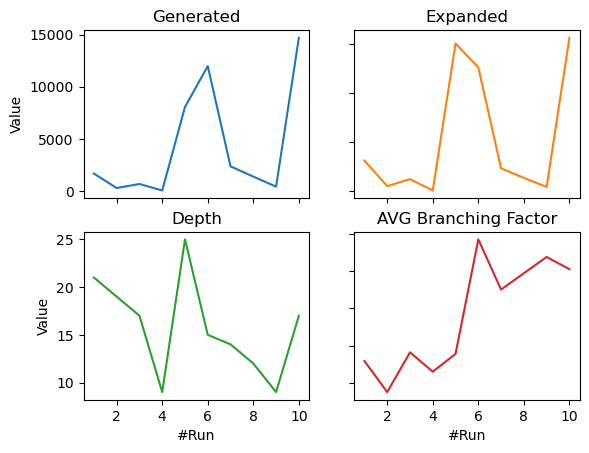

In [73]:
x = [1,2,3,4,5,6,7,8,9,10]

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, generateMan)
axs[0, 0].set_title('Generated')
axs[0, 1].plot(x, expandMan, 'tab:orange')
axs[0, 1].set_title('Expanded')
axs[1, 0].plot(x, depthMan, 'tab:green')
axs[1, 0].set_title('Depth')
axs[1, 1].plot(x, branchingFactorMan, 'tab:red')
axs[1, 1].set_title('AVG Branching Factor')

for ax in axs.flat:
    ax.set(xlabel='#Run', ylabel='Value')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('Manhattan.png')

## Weighted Manhattan

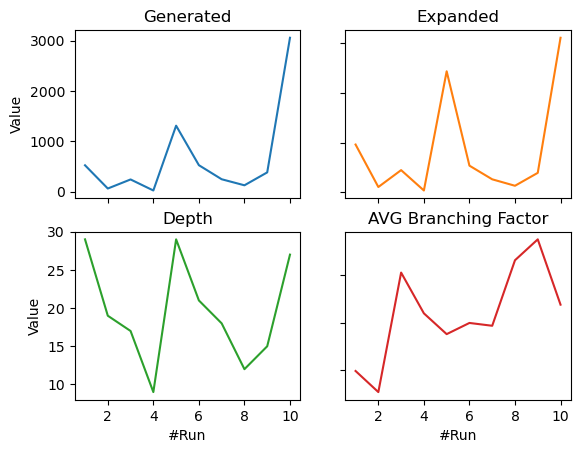

In [72]:
x = [1,2,3,4,5,6,7,8,9,10]

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, generateWeightedMan)
axs[0, 0].set_title('Generated')
axs[0, 1].plot(x, expandWeightedMan, 'tab:orange')
axs[0, 1].set_title('Expanded')
axs[1, 0].plot(x, depthWeightedMan, 'tab:green')
axs[1, 0].set_title('Depth')
axs[1, 1].plot(x, branchingFactorWeightedMan, 'tab:red')
axs[1, 1].set_title('AVG Branching Factor')

for ax in axs.flat:
    ax.set(xlabel='#Run', ylabel='Value')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('WeightedManhattan.png')

## Average Comparitive Plot

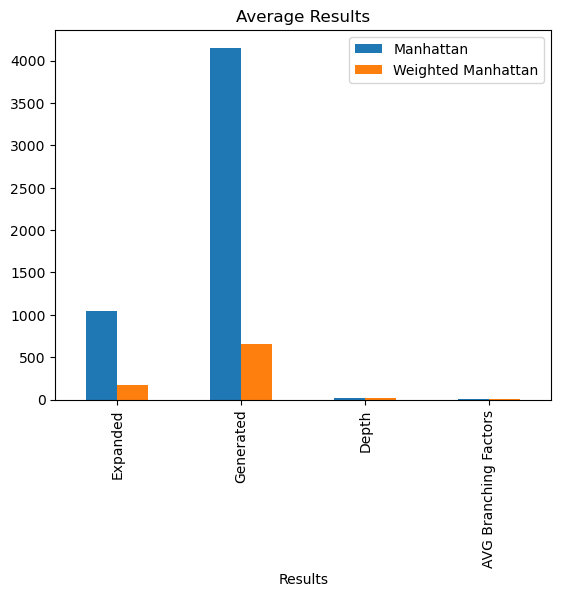

In [49]:
# create data
df = pd.DataFrame([['Expanded', AvgExpandManhattan,AvgExpandWeightedManhattan], ['Generated', AvgGenerateManhattan, AvgGenerateWeightedManhattan],['Depth', AvgDepthManhattan, AvgDepthWeightedManhattan], ['AVG Branching Factors',AvgBranchingFactorManhattan, AvgBranchingFactorWeightedManhattan]],
                  columns=['Results', 'Manhattan', 'Weighted Manhattan'])
# view data
ax = df.plot(x='Results',
             kind='bar',
             stacked=False,
             title='Average Results')
plt.savefig('AvgResult.png')
plt.show()